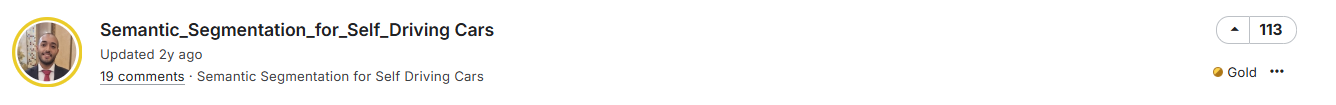

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [9]:
img_path = r"D:\code_study\ML_CODE\dataSets\Segmentation\Semantic_Segmentation_for_Self_Driving_Cars\archive"
img_path = img_path.replace('\\', '/')

In [10]:
def display_images(data, no_img_mask):
    
    # Load the images from the files

    images = glob.glob(img_path + '/'+data+'/'+data+'/CameraRGB/*.png')[:no_img_mask]
    masks = glob.glob(img_path + '/' +data+'/'+data+'/CameraSeg/*.png')[:no_img_mask]

    for i in range(len(images)):
        images[i] = cv2.imread(images[i])
        masks[i] = cv2.imread(masks[i], cv2.IMREAD_GRAYSCALE)



    fig, axes = plt.subplots(no_img_mask, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

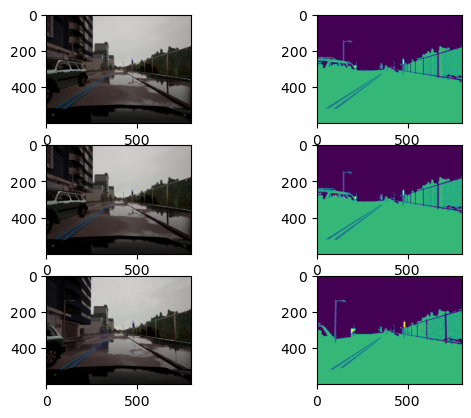

In [11]:
display_images('dataA', 3)

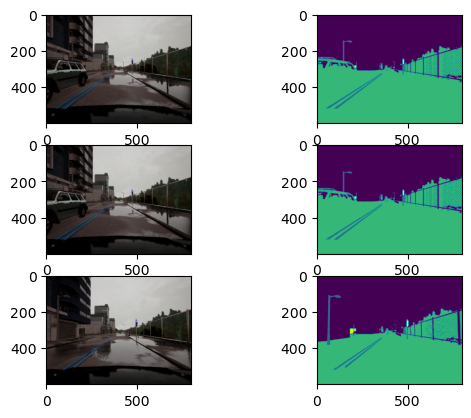

In [12]:
display_images('dataB', 3)

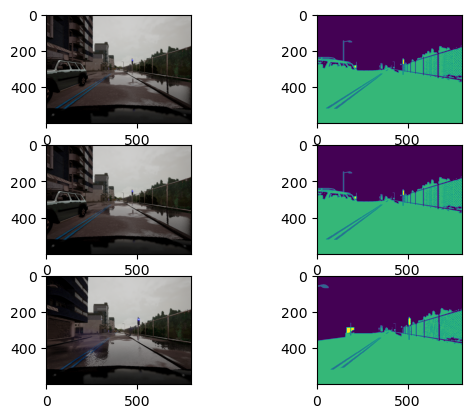

In [13]:
display_images('dataC', 3)

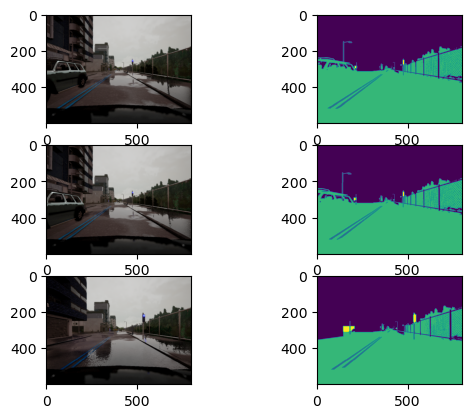

In [14]:
display_images('dataD', 3)

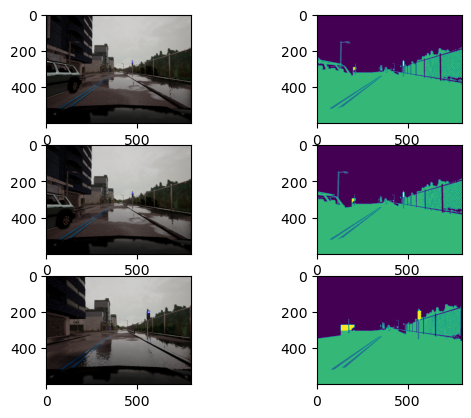

In [15]:
display_images('dataE', 3)

In [17]:
images_list = []
masks_list = []
def store_imgs_masks(data):
    images_list.append(glob.glob(img_path + '/'+data+'/'+data+'/CameraRGB/*.png'))
    masks_list.append(glob.glob(img_path + '/'+data+'/'+data+'/CameraSeg/*.png'))

In [18]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

In [19]:
print(images_list[0][:5],'\n')
print(masks_list[0][:5])

['D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_000.png', 'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_001.png', 'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_010.png', 'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_011.png', 'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_020.png'] 

['D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraSeg\\02_00_000.png', 'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraSeg\\02_00_001.png', 'D:/code_study/ML_CODE/dataSets/Segmentation

In [20]:
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [21]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)

In [22]:
print(images_list[50], '\n')
print(masks_list[50])

D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\02_01_000.png 

D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraSeg\02_01_000.png


In [23]:
image_list_ds = tf.data.Dataset.list_files(images_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(masks_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code_study\\ML_CODE\\dataSets\\Segmentation\\Semantic_Segmentation_for_Self_Driving_Cars\\archive\\dataA\\dataA\\CameraRGB\\02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code_study\\ML_CODE\\dataSets\\Segmentation\\Semantic_Segmentation_for_Self_Driving_Cars\\archive\\dataA\\dataA\\CameraSeg\\02_00_000.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code_study\\ML_CODE\\dataSets\\Segmentation\\Semantic_Segmentation_for_Self_Driving_Cars\\archive\\dataA\\dataA\\CameraRGB\\02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code_study\\ML_CODE\\dataSets\\Segmentation\\Semantic_Segmentation_for_Self_Driving_Cars\\archive\\dataA\\dataA\\CameraSeg\\02_00_001.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code_study\\ML_CODE\\dataSets\\Segmentation\\Semantic_Segmentation_for_Self_Driving_Cars\\archive\\dataA\\dataA\\CameraRGB\\02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'D:\\code

In [24]:
image_filenames = tf.constant(images_list)
masks_filenames = tf.constant(masks_list)
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraRGB\\02_00_000.png', shape=(), dtype=string)
tf.Tensor(b'D:/code_study/ML_CODE/dataSets/Segmentation/Semantic_Segmentation_for_Self_Driving_Cars/archive/dataA/dataA/CameraSeg\\02_00_000.png', shape=(), dtype=string)


In [25]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [26]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    
    if dropout_prob > 0:
        conv = tfl.Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [27]:
def conv_block_2(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection

In [28]:
def conv_block_3(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection

In [29]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    return conv

In [30]:
def upsampling_block_2(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    return layer

In [31]:
def upsampling_block_3(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    return layer

In [32]:
def unet_model(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block(inputs, n_filters)
    
    cblock2 = conv_block(cblock1[0], n_filters * 2)
    cblock3 = conv_block(cblock2[0], n_filters * 4)
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)
    
    conv9 = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tfl.Conv2D(n_classes, 1, padding='same')(conv9)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

In [33]:
def unet_model2(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block_2(inputs, n_filters)
    
    cblock2 = conv_block_2(cblock1[0], n_filters * 2)
    cblock3 = conv_block_2(cblock2[0], n_filters * 4)
    cblock4 = conv_block_2(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block_2(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block_2(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_2(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_2(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_2(ublock8, cblock1[1], n_filters)
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model

In [34]:
def unet_model3(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block_3(inputs, n_filters)
    
    cblock2 = conv_block_3(cblock1[0], n_filters * 2)
    cblock3 = conv_block_3(cblock2[0], n_filters * 4)
    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model

In [35]:
img_height = 192
img_width = 256
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))
unet2 = unet_model2((img_height, img_width, num_channels))
unet3 = unet_model3((img_height, img_width, num_channels))

In [36]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 192, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 192, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 96, 128, 32)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [37]:
unet2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 192, 256, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 192, 256, 32) 128         conv2d_20[0][0]                  
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 192, 256, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [38]:
unet3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 192, 256, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 192, 256, 32) 128         conv2d_40[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 192, 256, 32) 0           batch_normalization_20[0][0]     
____________________________________________________________________________________________

In [39]:
unet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

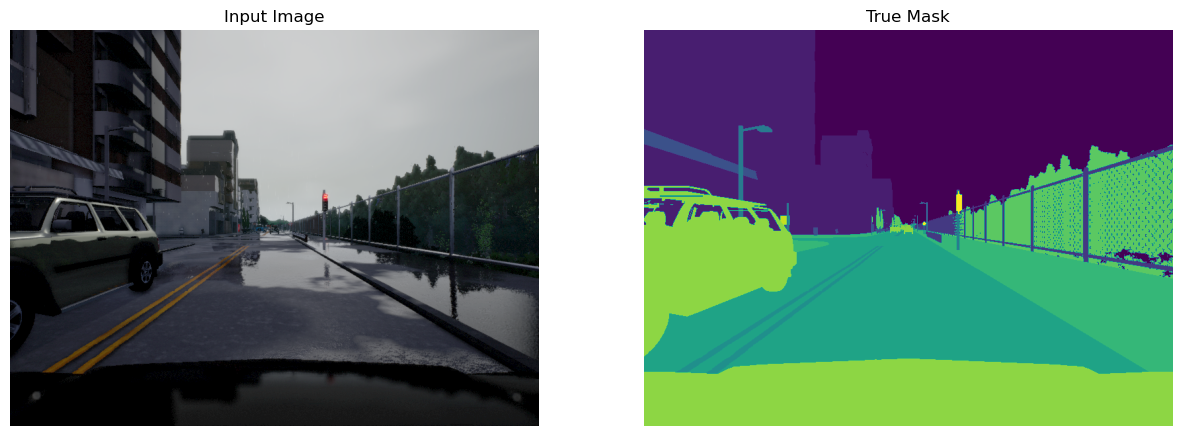

In [41]:
for image, mask in image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

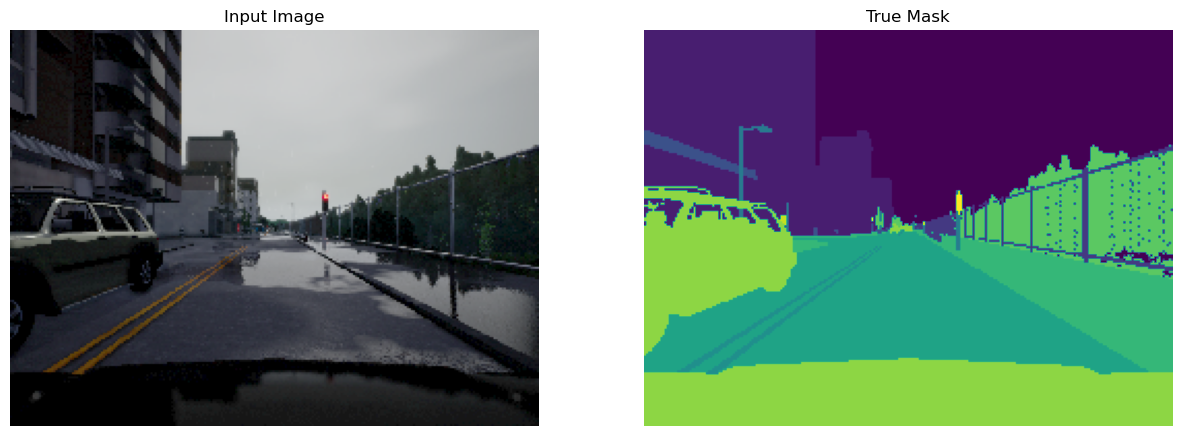

In [42]:
for image, mask in processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [45]:
EPOCHS = 50
BUFFER_SIZE = 1000
BATCH_SIZE = 32
map_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# Splitting data to training set and val set
num_samples = map_dataset.reduce(0, lambda x, _: x + 1).numpy()
train_dataset = map_dataset.take(int(0.8 * num_samples))
val_dataset = map_dataset.skip(int(0.8 * num_samples))
print(processed_image_ds)
# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

<MapDataset shapes: ((192, 256, 3), (192, 256, 1)), types: (tf.float32, tf.uint8)>


In [46]:
model_history1 = unet.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50
125/125 [==============================] - 85s 600ms/step - loss: 1.0361 - accuracy: 0.6581 - val_loss: 0.4928 - val_accuracy: 0.8323
Epoch 2/50
125/125 [==============================] - 74s 590ms/step - loss: 0.3741 - accuracy: 0.8834 - val_loss: 0.3180 - val_accuracy: 0.9029
Epoch 3/50
125/125 [==============================] - 74s 592ms/step - loss: 0.2453 - accuracy: 0.9230 - val_loss: 0.2148 - val_accuracy: 0.9322
Epoch 4/50
125/125 [==============================] - 74s 594ms/step - loss: 0.1943 - accuracy: 0.9385 - val_loss: 0.1685 - val_accuracy: 0.9465
Epoch 5/50
125/125 [==============================] - 75s 600ms/step - loss: 0.1555 - accuracy: 0.9503 - val_loss: 0.1436 - val_accuracy: 0.9539
Epoch 6/50
125/125 [==============================] - 75s 598ms/step - loss: 0.1339 - accuracy: 0.9568 - val_loss: 0.1280 - val_accuracy: 0.9586
Epoch 7/50
125/125 [==============================] - 74s 589ms/step - loss: 0.1189 - accuracy: 0.9613 - val_loss: 0.1131 - val_ac

In [ ]:
model_history2 = unet2.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

In [ ]:
model_history3 = unet3.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

In [47]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

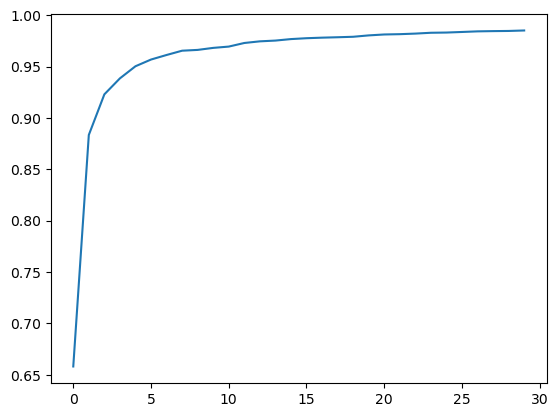

In [48]:
plt.plot(model_history1.history["accuracy"])

In [49]:
plt.plot(model_history2.history["accuracy"])

NameError: name 'model_history2' is not defined

In [ ]:
plt.plot(model_history3.history["accuracy"])

In [55]:
def show_predictions(unet = unet, dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions(unet,train_dataset, 6)

In [52]:
tf.keras.models.save_model(unet, 'model.h5')

In [53]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'model.zip'):
    """
    zip all the files in a directory

    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory

    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'

    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [54]:
zip_dir()

d:\code_study\ML_CODE\kaggle\Segmentation\Semantic Segmentation for Self Driving Cars\Semantic_Segmentation_for_Self_Driving Cars\model.zip